# Expedia Hotel Recommendation System
This file is used to describe the evaluation result of Random Forest and Support Vector Regression. The file being used is only 1% of the total file as it will be hard to interpret and have a long time to wait for the result.

Authors: 
- Alessandro Luiz Kartika (01082170029)
- Denny Raymond (01082170017)
- Winston Renatan (01082170030)

Informatics 2017, Universitas Pelita Harapan Main Campus

## Import
First we need to do imports of the package below to create the result we wanted. Some of the important thing to do the plotting is matplotlib.pyploy. While, the other is used to do changes to the data and to do calculation.

In [1]:
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
import seaborn as sns
import csv
from math import sqrt
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
# Import MSE & RMSE
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data
First we need to read the data from the one percent then shows the sample result of it. As what is done in the Random Forest, we would have hotel_cluster as the label or target result. We would then drop the target and save the resulting file as a numpy array.

In [2]:
# Read in data and display first 5 rows
features = pd.read_csv (r'clean_train_one_percent.csv', sep=',')
features.head(5)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,13,1,46,171,43387,315.9426,981882,0,0,9,2,0,1,12906,5,1,6,144,4,46
1,2,3,66,184,2037,612.1083,343914,0,0,0,2,0,1,12206,6,1,2,50,628,1
2,2,3,66,442,46296,1182.8995,960109,0,1,0,2,0,1,8802,1,1,2,50,503,22
3,2,3,66,174,44047,4.2071,81661,1,0,2,2,0,1,25471,6,1,2,50,365,48
4,34,3,205,135,40274,5757.0791,876704,0,0,9,2,0,1,16149,5,1,6,208,1798,81


In [3]:
# Labels are the values we want to predict
labels = np.array(features['hotel_cluster'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('hotel_cluster', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Random Forest Evaluation
We will do the train test split in this process using 75% as the train sets and 25% as the test sets. We then enter to the Random Forest processing with 1 decision tree to have the hotel_cluster result in integer (no decimal points). Here it is also printed the example results.

In [4]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
train_features, test_features, train_labels, test_val = train_test_split(features, labels, test_size = 0.25, random_state = 42)
# Instantiate model with 1 decision trees
rf = RandomForestRegressor(n_estimators = 1, random_state = 42)
# Train the model on training data  
rf.fit(train_features, train_labels)

# Use the forest's predict method on the train data
# true = rf.predict(train_features)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print(predictions)

[16. 64. 84. ... 42. 95. 68.]


We would continue the process by counting the resulting errors.

In [5]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')
print('MSE: ', metrics.mean_squared_error(test_val, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_val, predictions)))
print('R*R:', rf.score(test_features, test_val),'.')

Mean Absolute Error: 32.88 .
MSE:  1667.90088638195
RMSE:  40.839942291608956
R*R: -1.0020356876836374 .


Here we would like to plot the real data against the predicted data with matplotlib which we already save as plt on the import place. Below is the resulting Random Forest evaluation.

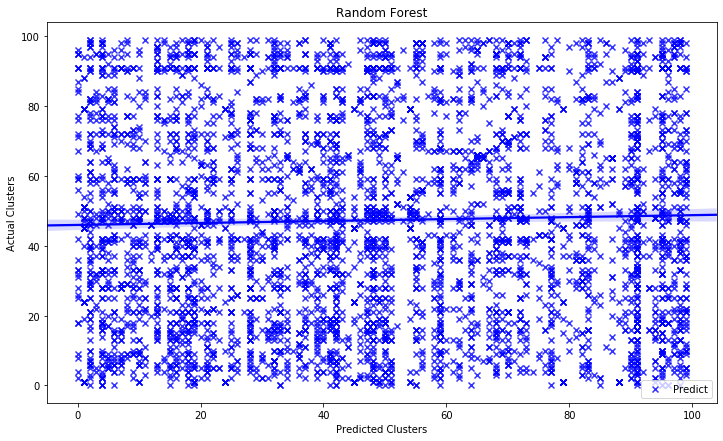

In [6]:
plt.figure(figsize=(12,7))
sns.regplot(predictions,test_val, color='blue', label = 'Predict', marker = 'x')
plt.legend()
plt.title('Random Forest')
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.show()

# Support Vector Regression
We will do the train test split in this process using 75% as the train sets and 25% as the test sets. We then enter to the Support Vector Regression processing with 1 decision tree to have the hotel_cluster result in integer (no decimal points). Here it is also printed the example results.

In [7]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
train_features, test_features, train_labels, test_val = train_test_split(features, labels, test_size = 0.25, random_state = 42)
# Instantiate model with 1 decision trees
clf =  svm.SVR(kernel='rbf', gamma='scale')
# Train the model on training data  
clf.fit(train_features, train_labels)

# Use the forest's predict method on the train data
# true = rf.predict(train_features)
# Use the forest's predict method on the test data
pred = clf.predict(test_features)
print(pred)

[46.09472806 47.04784256 47.06927224 ... 46.21674262 47.22864288
 46.15874578]


We would continue the process by counting the resulting errors.

In [8]:
# Calculate the absolute errors
errors = abs(pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')
print('MSE: ', metrics.mean_squared_error(test_val, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_val, pred)))

Mean Absolute Error: 24.35 .
MSE:  833.4873214279321
RMSE:  28.87018048831583


Here we would like to plot the real data against the predicted data with matplotlib which we already save as plt on the import place. Below is the resulting Random Forest evaluation.

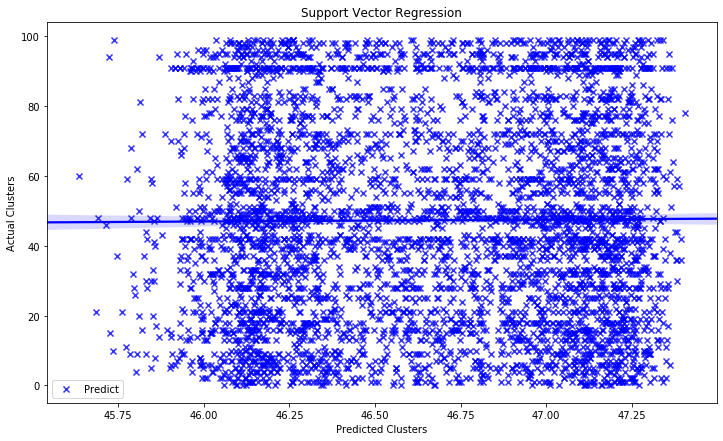

In [9]:
plt.figure(figsize=(12,7))
sns.regplot(pred, test_val, color='blue', label = 'Predict', marker = 'x')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.show()